A bunch of different plots that were used in the paper, plus some that didn't make the cut:

1) First layer activations

2) Fourth layer activations

3) **Penultimate layer activations**

4-6) Filter weights

7) **Qualitative Input HCQT -- Predicted Output -- Target Output Example**

8) **Example of all layers of the HCQT and Target output**


In [8]:
import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
cd ../deepsalience/

/Users/rabitt/Dropbox/MARL/repos/multif0/deepsalience


In [3]:
import multif0_exper11_batchin

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15986505013928050753
]


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
model = multif0_exper11_batchin.model_def()

In [5]:
model.load_weights("../comparisons/multif0/experiment11b_output/multif0_exper11_batchin.pkl")

In [6]:
model.summary(line_length=90)

__________________________________________________________________________________________
Layer (type)                            Output Shape                        Param #       
input_1 (InputLayer)                    (None, None, None, 6)               0             
__________________________________________________________________________________________
batch_normalization_1 (BatchNormalizati (None, None, None, 6)               24            
__________________________________________________________________________________________
bendy1 (Conv2D)                         (None, None, None, 128)             19328         
__________________________________________________________________________________________
batch_normalization_2 (BatchNormalizati (None, None, None, 128)             512           
__________________________________________________________________________________________
bendy2 (Conv2D)                         (None, None, None, 64)              204864        

In [9]:
npy_file = "../paper-figs/VS01_Schumann_audio_input.npy"
data = np.load(npy_file).transpose(1, 2, 0)[np.newaxis, :, :, :]

intermediate_layer_bendy1 = keras.models.Model(inputs=model.input,
                                 outputs=model.get_layer('bendy1').output)
intermediate_layer_bendy2 = keras.models.Model(inputs=model.input,
                                 outputs=model.get_layer('bendy2').output)
intermediate_layer_smoothy1 = keras.models.Model(inputs=model.input,
                                 outputs=model.get_layer('smoothy1').output)
intermediate_layer_smoothy2 = keras.models.Model(inputs=model.input,
                                 outputs=model.get_layer('smoothy2').output)
intermediate_layer_distr = keras.models.Model(inputs=model.input,
                                 outputs=model.get_layer('distribute').output)


In [124]:
intermediate_output_bendy1 = intermediate_layer_bendy1.predict(data)

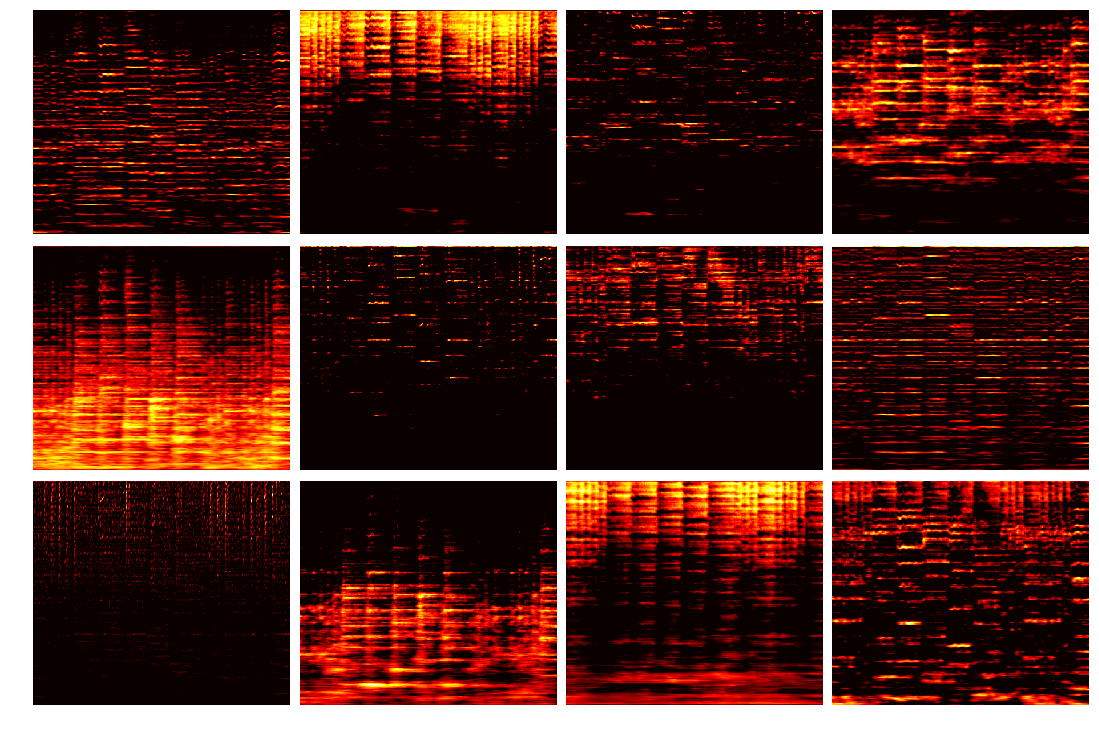

In [160]:
plt.figure(figsize=(15, 10))
for i, layer in enumerate([0, 1, 3, 4, 5, 7, 8, 10, 11, 12, 15, 40]):
    plt.subplot(3, 4, i + 1)
    plt.imshow(intermediate_output_bendy1[0, :, 250:700, layer], origin='lower', cmap='hot')
    plt.axis('tight')
    plt.axis('off')
plt.subplots_adjust(wspace=-8, hspace=-10)
plt.tight_layout()
plt.savefig("../paper-figs/bendy1_activations.pdf", format='pdf')

In [164]:
intermediate_output_smoothy2 = intermediate_layer_smoothy2.predict(data)

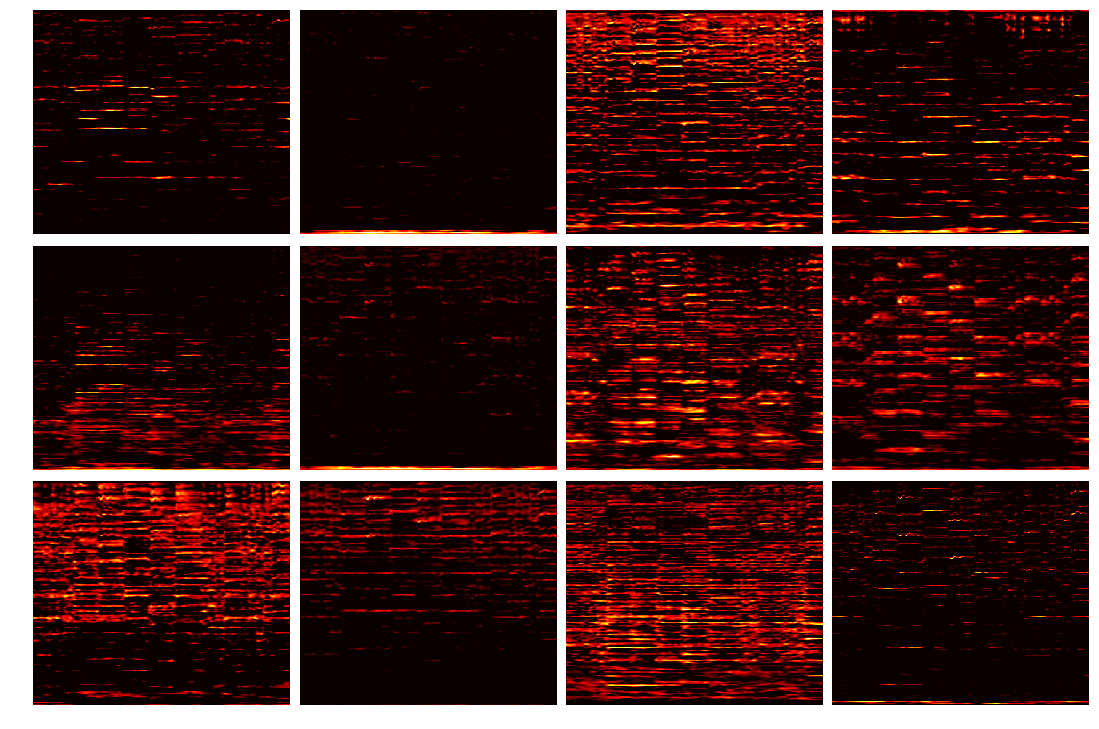

In [169]:
plt.figure(figsize=(15, 10))
for i, layer in enumerate([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]):
    plt.subplot(3, 4, i + 1)
    plt.imshow(intermediate_output_smoothy2[0, :, 250:700, layer], origin='lower', cmap='hot')
    plt.axis('tight')
    plt.axis('off')
plt.subplots_adjust(wspace=-8, hspace=-10)
plt.tight_layout()
plt.savefig("../paper-figs/smoothy2_activations.pdf", format='pdf')

In [166]:
intermediate_output_distr = intermediate_layer_distr.predict(data)

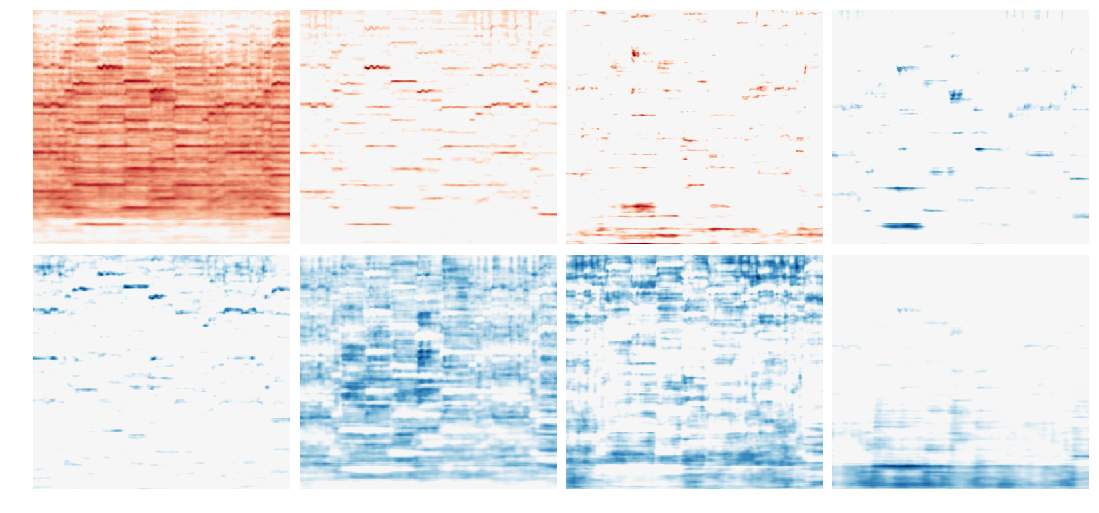

In [205]:
conv_layer = model.get_layer(name='squishy')
weights = conv_layer.get_weights()
w = weights[0][0, 0, :, 0]

constrained = intermediate_output_distr[0, :, 250:700, :]

vmin = np.infty
vmax = -1.0*np.infty
for i in range(8):
    layer = constrained[:, :, i]*np.sign(w[i])
    if np.min(layer) < vmin:
        vmin = np.min(layer)
    if np.max(layer) > vmax:
        vmax = np.max(layer)

if np.abs(vmin) > vmax:
    vmax = -1.0*vmin
if np.abs(vmin) < vmax:
    vmin = -1.0*vmax
        
plt.figure(figsize=(15, 7))
for i, layer in enumerate([2, 4, 1, 0, 7, 5, 3, 6]):
    plt.subplot(2, 4, i + 1)
    max_abs = np.max(np.abs(constrained[:, :, layer]))
    plt.imshow(-1.0*constrained[:, :, layer]*np.sign(w[layer]),
               origin='lower', cmap='RdBu', vmin=-1.0*max_abs, vmax=max_abs)

    plt.axis('tight')
    plt.axis('off')
plt.subplots_adjust(wspace=-8, hspace=-10)
plt.tight_layout()
plt.savefig("../paper-figs/distr_activations.pdf", format='pdf')

In [50]:
cmap = 'RdBu'

In [55]:
# plot filters
conv_layer = model.get_layer(name='bendy1')
weights = conv_layer.get_weights()
weight_array = weights[0]

print(weight_array.shape)
vmin = weight_array.min()
vmax = weight_array.max()
print(vmin)
print(vmax)
for layer in range(weight_array.shape[2]):
    plt.figure(figsize=(16, 8))
    for i in range(weight_array.shape[3]):
        plt.subplot(8, 16, i+1)
        plt.imshow(
            weight_array[:, :, layer, i], origin='lower',
            vmin=vmin, vmax=vmax, cmap=cmap
        )
        plt.axis('off')
    plt.subplots_adjust(wspace=None, hspace=None)
    plt.savefig(
        '../paper-figs/bendy1_harmonic_{}.pdf'.format(layer),
        format='pdf', bbox_inches='tight'
    )

(5, 5, 6, 128)
-0.271468
0.409124


(70, 3, 64, 8)


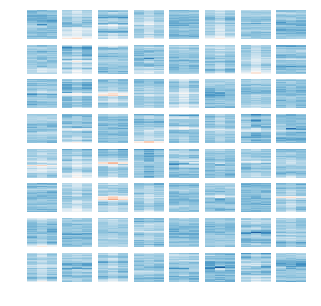

In [85]:
conv_layer = model.get_layer(name='distribute')
weights = conv_layer.get_weights()
weight_array = weights[0]

vmin = weight_array.min()
vmax = weight_array.max()

layer = 42

print(weight_array.shape)
# plt.figure(figsize=(8, 4))
plt.figure(figsize=(5, 5))
for i in range(64):
#     plt.subplot(2, 4, i+1)
    plt.subplot(8, 8, i+1)
    plt.imshow(
        weight_array[:, :, i, 2], origin='lower',
        vmin=weight_array.min(), vmax=weight_array.max(),
        cmap=cmap
    )
    plt.axis('off')
    plt.axis('auto')
plt.subplots_adjust(wspace=None, hspace=None)
plt.savefig(
    '../paper-figs/weights_octave_filt2.pdf',
    format='pdf', bbox_inches='tight'
)

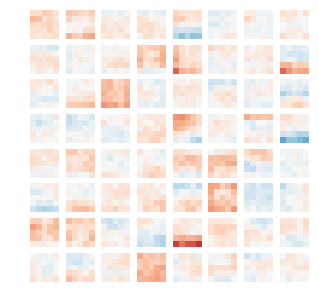

In [74]:
# plot filters
conv_layer = model.get_layer(name='bendy2')
weights = conv_layer.get_weights()
weight_array = weights[0]
vmin = weight_array.min()
vmax = weight_array.max()
layer = 0
plt.figure(figsize=(5, 5))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(
        weight_array[:, :, layer, i], origin='lower',
        vmin=vmin, vmax=vmax, cmap=cmap
    )
    plt.axis('off')
    plt.axis('square')
plt.subplots_adjust(wspace=None, hspace=None)
plt.savefig(
    '../paper-figs/bendy2_layer0.pdf',
    format='pdf', bbox_inches='tight'
)

In [172]:
# plot filters
conv_layer = model.get_layer(name='squishy')
weights = conv_layer.get_weights()
print(weights)
weight_array = weights[0]
print(weight_array.shape)
# vmin = weight_array.min()
# vmax = weight_array.max()
# plt.plot(weight_array[0, 0, :, 0], '.')

# layer = 0
# plt.figure(figsize=(5, 5))
# for i in range(64):
#     plt.subplot(8, 8, i+1)
#     plt.imshow(
#         weight_array[:, :, layer, i], origin='lower',
#         vmin=vmin, vmax=vmax, cmap=cmap
#     )
#     plt.axis('off')
#     plt.axis('square')
# plt.subplots_adjust(wspace=None, hspace=None)
# plt.savefig(
#     '../paper-figs/bendy2_layer0.pdf',
#     format='pdf', bbox_inches='tight'
# )

[array([[[[-1.32257593],
         [ 1.35587096],
         [ 1.46502316],
         [-1.21635282],
         [ 1.42254293],
         [-1.30643642],
         [-1.47691798],
         [-1.22504187]]]], dtype=float32), array([-0.44832137], dtype=float32)]
(1, 1, 8, 1)


In [47]:
import numpy as np
import mir_eval
import seaborn as sns

In [12]:
cd ../deepsalience/

/Users/rabitt/Dropbox/MARL/repos/multif0/deepsalience


In [13]:
import compute_training_data as C

In [14]:
Y_pred = np.load("../comparisons/multif0/experiment11b_output/VS01_Schumann_prediction.npy")
X = np.load("../paper-figs/VS01_Schumann_audio_input.npy")
ref_times, ref_freqs = mir_eval.io.load_ragged_time_series("../paper-figs/VS01_Schumann.txt")

# Y_pred = np.load("../experiment11b_output/CelestialShore_DieForUs_prediction.npy")
# X = np.load("../paper-figs/CelestialShore_DieForUs_multif0_MIX_input.npy")
# ref_times, ref_freqs = mir_eval.io.load_ragged_time_series("../comparisons/mdb_test/CelestialShore_DieForUs.txt")

# Y_pred = np.load("../experiment11b_output/Phoenix_ElzicsFarewell_prediction.npy")
# X = np.load("../paper-figs/Phoenix_ElzicsFarewell_multif0_MIX_input.npy")
# ref_times, ref_freqs = mir_eval.io.load_ragged_time_series("../comparisons/mdb_test/Phoenix_ElzicsFarewell.txt")


grid_times = C.get_time_grid(Y_pred.shape[1])
grid_freqs = C.get_freq_grid()

In [15]:
plot_times = []
plot_freqs = []
for t, freqs in zip(ref_times, ref_freqs):
    for f in freqs:
        plot_times.append(t)
        plot_freqs.append(f)

[861, 1895]
[9.9961904761904758, 22.000907029478459]


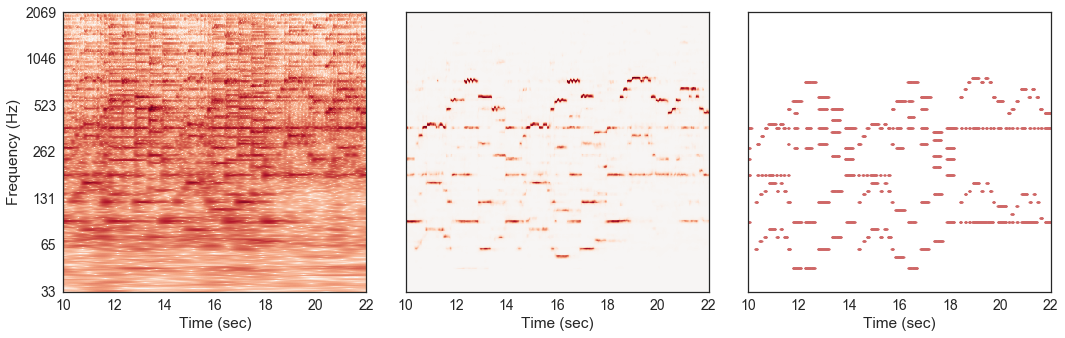

In [58]:
yticks_idx = [60*k for k in range(6)] + [359]
yticks_vals = [int(round(grid_freqs[f])) for f in yticks_idx]

sns.set(font_scale=1.4)
sns.set_style('white')

xlim = [np.argmin(np.abs(grid_times - 10)), np.argmin(np.abs(grid_times - 22))]
print(xlim)
xlim_gt = [grid_times[xlim[0]], grid_times[xlim[1]]]
print(xlim_gt)


xticks_idx = np.arange(X[1, : , :].shape[1])[::172]
xticks = grid_times[xlim[0]:xlim[1]][::172]
xticks = [int(np.round(x)) for x in xticks]

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(X[1, : , xlim[0]:xlim[1]], origin='lower', cmap='RdBu_r', vmin=-1)
plt.yticks(yticks_idx, yticks_vals)
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (sec)")
plt.xticks(xticks_idx, xticks)
plt.axis('auto')

plt.subplot(1,3,2)
plt.imshow((Y_pred[:, xlim[0]:xlim[1]]**0.8), origin='lower', cmap='RdBu_r', vmin=-1)
plt.yticks(yticks_idx, yticks_vals)
# plt.ylabel("Frequency (Hz)")
plt.xticks(xticks_idx, xticks)
plt.xlabel("Time (sec)")
plt.yticks([])
plt.axis('auto')

plt.subplot(1,3,3)#, axisbg='k')
plt.semilogy(plot_times, plot_freqs, '.', color='#CF6766', basey=2, markersize=4)
plt.ylim([np.min(grid_freqs), np.max(grid_freqs)])
plt.yticks(yticks_vals, yticks_vals)
plt.xlim(xlim_gt)
plt.yticks([])
plt.xlabel("Time (sec)")

plt.tight_layout()
plt.savefig(
    '../paper-figs/Su_VS01_output_horizontal.pdf',
    format='pdf', bbox_inches='tight'
)

In [63]:
import json
with open("../data_splits.json", 'r') as fhandle:
    dat_dict = json.load(fhandle)

In [69]:
len(dat_dict['train'])

184

In [66]:
len(dat_dict['test'])

28

In [68]:
len(dat_dict['validate'])

28

In [73]:
import medleydb as mdb
tot_duration = 0
for trackid in dat_dict['validate']:
    mtrack = mdb.MultiTrack(trackid)
    if mtrack.duration is not None:
        tot_duration += mtrack.duration
    else:
        print(trackid)

TheKillers_SomebodyToldMe
TomPettyAndTheHeartbreakers_IWontBackDown


In [74]:
tot_duration

5795.103311791382

In [98]:
mtrack = mdb.MultiTrack("MusicDelta_Beatles")
mel2 = mtrack.melody2_annotation

In [102]:
np.array(mel2).T.shape

(2, 6266)

In [60]:
import numpy as np
X = np.load("../paper-figs/MusicDelta_GriegTrolltog_multif0_complete_input.npy")
Y = np.load("../paper-figs/MusicDelta_GriegTrolltog_multif0_complete_output.npy")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

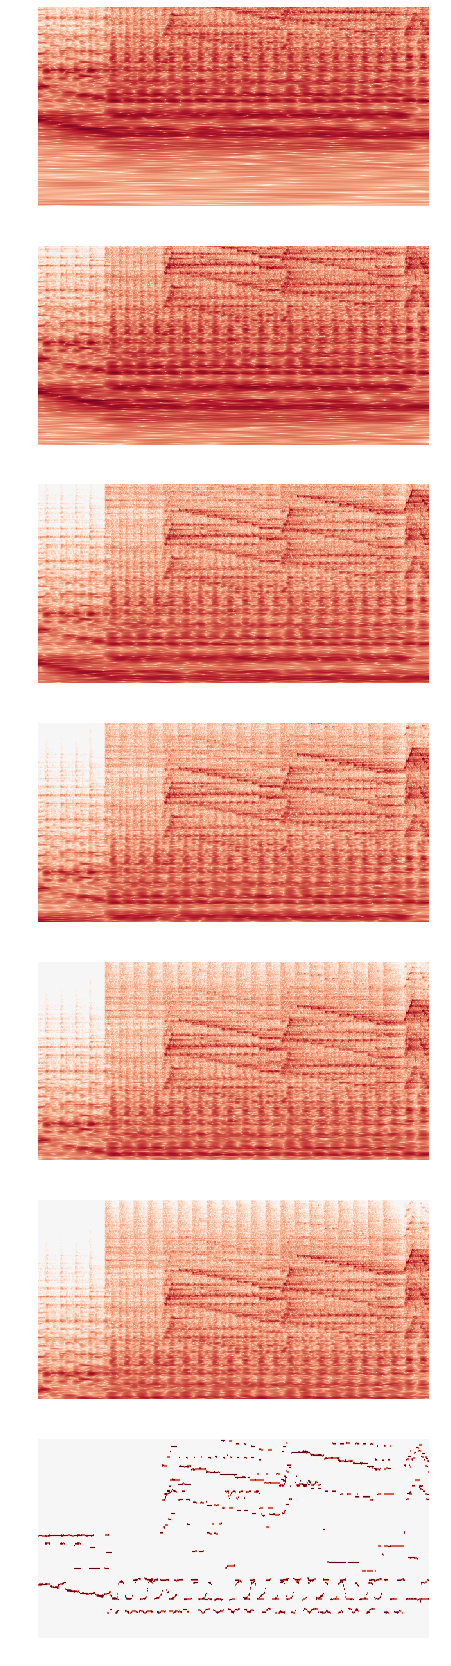

In [64]:
plt.figure(figsize=(7, 30))
for i in range(6):
    plt.subplot(7, 1, i + 1)
    plt.imshow(X[i, :, 2000:3000], origin='lower', cmap='RdBu_r', vmin=-1)
    plt.axis('tight')
    plt.axis('off')

plt.subplot(7, 1, 7)
plt.imshow(Y[:, 2000:3000], origin='lower', cmap='RdBu_r', vmin=-1)
plt.axis('tight')
plt.axis('off')
plt.savefig("hcqt_figparts.png", format='png')